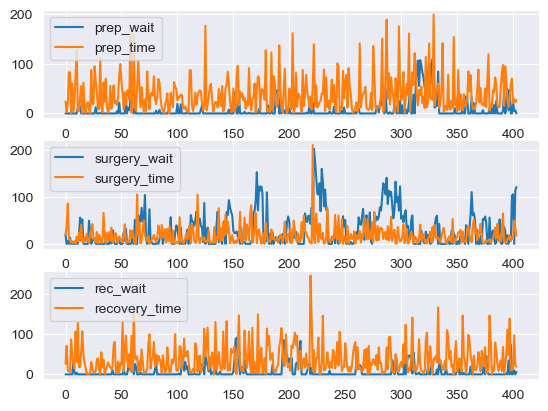

In [4]:
import simpy
from scipy import stats
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
times = pd.DataFrame(columns = ["name","prep_time","surgery_time","recovery_time","total_time","prep_wait","surgery_wait","rec_wait"])
def patient_stream(env):
    patients = 0
    while True:
        prep = stats.expon(scale = 40).rvs()
        op = stats.expon(scale = 20).rvs()
        recovery = stats.expon(scale = 40).rvs()
        patients +=1
        interarrival_time = stats.expon(scale = 25).rvs()
        #print(interarrival_time)
        yield env.timeout(interarrival_time)
        env.process(patient(env,f"Patient{patients} ",prep,op,recovery))

def patient(env,name,prep_time,surgery_time,recovery_time):
    arrival = env.now
    with preparation.request()as req:
        start_prep_wait = env.now
        yield req
        end_prep_wait = env.now
        yield env.timeout(prep_time)

    with operating_room.request()as req:
        start_surgery_wait = env.now
        yield req
        end_surgery_wait = env.now
        yield env.timeout(surgery_time)

    with recovery.request()as req:
        start_rec_wait = env.now
        yield req
        end_rec_wait = env.now
        yield env.timeout(recovery_time)

    total_time = env.now - arrival
    rec_wait = end_rec_wait - start_rec_wait
    surgery_wait = end_surgery_wait - start_surgery_wait
    prep_wait = end_prep_wait - start_prep_wait
    times.loc[len(times)] = [name,prep_time,surgery_time,recovery_time, total_time,prep_wait,surgery_wait,rec_wait]

env = simpy.Environment()
preparation = simpy.Resource(env,capacity = 3)
operating_room = simpy.Resource(env,capacity = 1)
recovery = simpy.Resource(env,capacity = 3)
env.process(patient_stream(env))

env.run(until=10000)
times

fig,axs=plt.subplots(nrows=3)
for wait,real,ax in zip(["prep_wait","surgery_wait","rec_wait"],["prep_time","surgery_time","recovery_time"],axs.ravel()):
    ax.plot(times[wait],label=wait)
    ax.plot(times[real],label=real)
    ax.legend()


In [2]:
import simpy
from scipy import stats
import matplotlib.pyplot as plt
import pandas as pd
def customer(env,name,service_time):
    print(f'{name} arrives at {env.now} ')
    with bank_counter.request()as req:
        yield req
        print(f'{name} starts service {env.now} ')
        yield env.timeout(service_time)
        print(f'{name} leaves at {env.now} ')

env = simpy.Environment()
bank_counter=simpy.Resource(env,capacity=1)
env.process(customer(env,"Customer 1",5))
env.process(customer(env,"Customer 2",3))
env.run(until=20)

Customer 1 arrives at 0 
Customer 2 arrives at 0 
Customer 1 starts service 0 
Customer 1 leaves at 5 
Customer 2 starts service 5 
Customer 2 leaves at 8 


np.float64(0.6411065453339619)

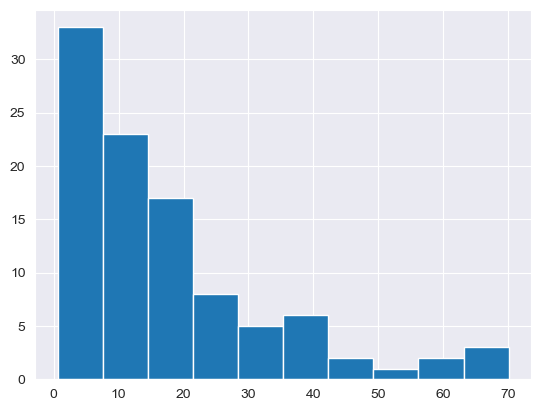

In [3]:
import numpy as np
dist = stats.expon(scale = 21)
data = []
for i in range(100):
    data.append(dist.rvs())
plt.hist(data)
np.min(data)